In [ ]:
import numpy as np
from sklearn import datasets
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier as RFC
from sklearn.tree import DecisionTreeClassifier as DT
from sklearn.metrics import accuracy_score

In [ ]:
oliv = datasets.fetch_olivetti_faces()
images = oliv.images # save images
target = oliv.target

In [ ]:
x = oliv.data
y = oliv.target

In [ ]:
pca = PCA()
pca.fit(x)

PCA()

In [ ]:
pca.components_.shape

(400, 4096)

In [ ]:
k = 0
total = pca.explained_variance_.sum()
cur_var = 0

while cur_var/total<0.95:
    cur_var += pca.explained_variance_[k]
    k += 1
k

123

In [ ]:
pca = PCA(k)
oliv_pca = pca.fit_transform(x)
oliv_pca.shape

(400, 123)

In [ ]:
pca.components_.shape

(123, 4096)

In [ ]:
x_train,x_test,y_train,y_test = train_test_split(oliv_pca,target,random_state=23,stratify=target)

In [ ]:
x_train.shape , y_train.shape

((300, 123), (300,))

In [ ]:
x_test.shape , y_test.shape

((100, 123), (100,))

In [ ]:

clfD = DT()
clfD.fit(x_train,y_train)
prediction_training_targets = clfD.predict(x_train)
self_accuracy = accuracy_score(y_train, prediction_training_targets)
print("Accuracy for training data (self accuracy):", self_accuracy)
predictionD_test_targets = clfD.predict(x_test)
test_accuracy = accuracy_score(y_test, predictionD_test_targets)
print("Accuracy for test data:", test_accuracy)

Accuracy for training data (self accuracy): 1.0
Accuracy for test data: 0.5


In [ ]:
clfR = RFC()
clfR.fit(x_train,y_train)
prediction_training_targets = clfR.predict(x_train)
self_accuracy = accuracy_score(y_train, prediction_training_targets)
print("Accuracy for training data (self accuracy):", self_accuracy)
predictionR_test_targets = clfR.predict(x_test)
test_accuracy = accuracy_score(y_test, predictionR_test_targets)
print("Accuracy for test data:", test_accuracy)

Accuracy for training data (self accuracy): 1.0
Accuracy for test data: 0.9


In [ ]:
def plot_images(images, predIM, rightIM, total_images=5, rows=1, cols=5):
    fig = plt.figure( figsize=(16, 16))# create a new figure window
    font1 = {'family':'serif','color':'black','size':15}
    for i in range(total_images): # display 20 images
        img_grid = fig.add_subplot(rows, cols, i+1)
        plt.title("prediction id:{}".format(predIM[i]),font1)
        plt.xlabel("right id:{}".format(rightIM[i]),font1)
        img_grid.imshow(images[i],cmap='gray')

Predicting images(Decision tree): 


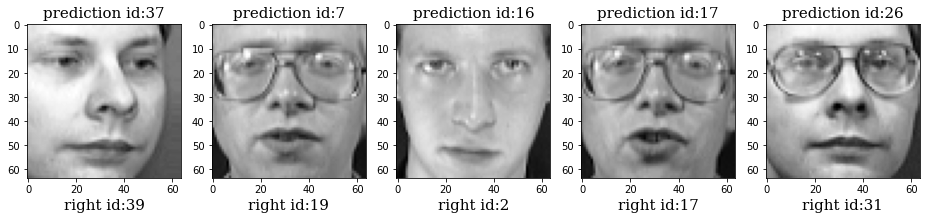

In [ ]:
pred = []
right = []
# predicting decision tree
print("Predicting images(Decision tree): ")
for i in range (5):
        pred.append(predictionD_test_targets[i])
        right.append(y_test[i])

# store test images in list
faces_test = []
for i in y_test:
    faces_test.append(images[i])

# store predicted images in list
faces_predict = []
for i in predictionD_test_targets:
    faces_predict.append(images[i])
plot_images(faces_test, pred, right, total_images=5)
#plot_images(faces_predict, pred,right, total_images=20)
plt.show()


Predicting images(Random forest): 


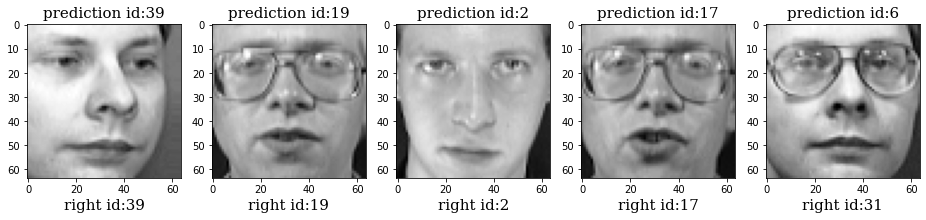

In [ ]:
pred = []
right = []
# predicting Random forest
print("Predicting images(Random forest): ")
for i in range (20):
        pred.append(predictionR_test_targets[i])
        right.append(y_test[i])

# store test images in list
faces_test = []
for i in y_test:
    faces_test.append(images[i])

# store predicted images in list
faces_predict = []
for i in predictionR_test_targets:
    faces_predict.append(images[i])
plot_images(faces_test, pred, right, total_images=5)
#plot_images(faces_predict, pred,right, total_images=20)
plt.show()
